In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import utils as u

/Users/Mathian/Documents/IA/Vision_par_ordinateur/VisualChess/code


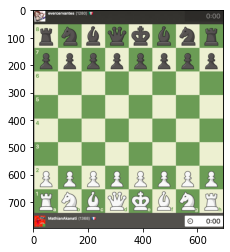

In [2]:
chess_rgb = u.show_and_get_colored_img('.././photos_test/chess.com/0.png')
#WoW_g = u.show_and_get_gray_img('.././photos_test/square/with_pieces/white_on_white_c.png')


In [3]:
def get_coord_square(point_list):
    Xmin = int((point_list[0][0] + point_list[2][0]) / 2)
    Xmax = int((point_list[1][0] + point_list[3][0]) / 2)
    Ymin = int((point_list[0][1] + point_list[1][1]) / 2)
    Ymax = int((point_list[2][1] + point_list[3][1]) / 2)
    return Xmin, Xmax, Ymin, Ymax

def get_square(img, Xmin, Xmax, Ymin, Ymax):
    return img[Ymin:Ymax, Xmin:Xmax] # X et Y sont inversés, je ne sais pas pq


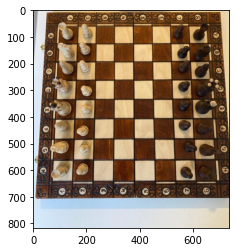

In [4]:
board_test = u.show_and_get_colored_img('.././photos_test/guilhem_board/0.jpg')
boxes_test = u.get_test_boxes()

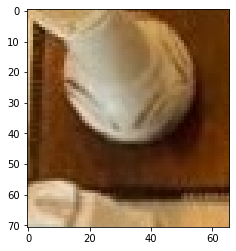

In [5]:
point_list = boxes_test['a1']
Xmin, Xmax, Ymin, Ymax = get_coord_square(point_list)
square_img = get_square(board_test, Xmin, Xmax, Ymin, Ymax)
plt.imshow(square_img, cmap='gray')
plt.show()

64


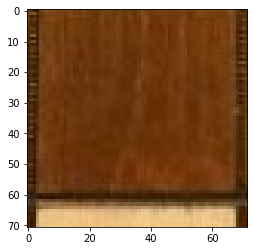

In [6]:
def get_all_squares(boxes, board):
    square_list = []
    for square in boxes:
        Xmin, Xmax, Ymin, Ymax = get_coord_square(boxes[square])
        square_list.append(get_square(board, Xmin, Xmax, Ymin, Ymax))
    return square_list

print(len(boxes_test))
square_list = get_all_squares(boxes_test, board_test)
len(square_list)
plt.imshow(square_list[2], cmap='gray')
plt.show()

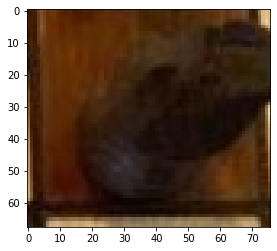

In [7]:
plt.imshow(square_list[15], cmap='gray')
plt.show()


Image : 15
empty


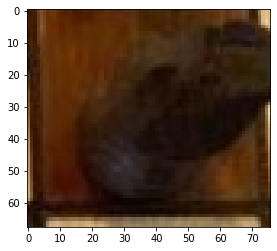


Image : 22
empty


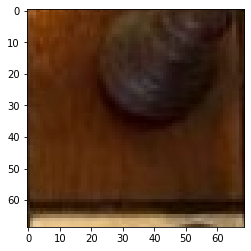


Image : 50
empty


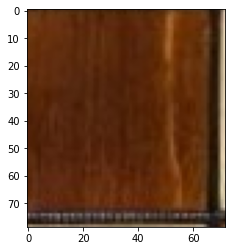


Image : 61
empty


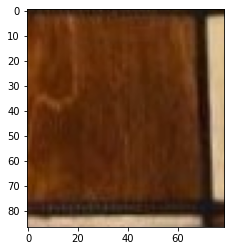


Image : 54
black


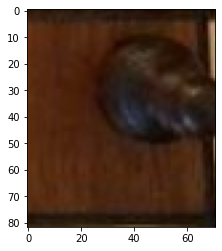


Image : 47
black


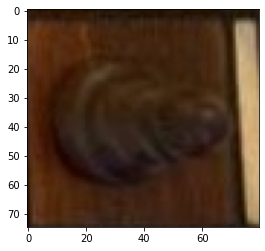

In [8]:
square_states = ['empty', 'white', 'black']

def square_color(square):
    '''
        return 0 if the square is empty
        return 1 if there is a white piece in the square
        return 2 if the piece is black
    '''
    if u.is_piece_in_square(square):
        return 2 - u.is_piece_white(square) 
    return 0


# for i in range(64):
#     print('\nImage :', i)
#     print(square_states[square_color(square_list[i])])
#     plt.imshow(square_list[i], cmap='gray')
#     plt.show()

pb_image = [15, 22, 50, 61, 54, 47]
for i in pb_image :
    print('\nImage :', i)
    print(square_states[square_color(square_list[i])])
    plt.imshow(square_list[i], cmap='gray')
    plt.show()

# On a des pb pour cette image, pour les résoudre, on va plutot s'intéresser au gradient relatif aux 3 couleurs !
# S'intéreser uniquement au niveau de gris n'est pas suffisant
# Détection de contour pour savoir si il y a une piece

In [9]:
def squares_to_array(square_list):
    board = np.zeros([8,8])
    for i in range(8):
        for j in range(8):
            board[i,j] = square_color(square_list[j * 8 + (7-i)])
    return board

squares_to_array(square_list)

array([[2., 0., 2., 2., 2., 2., 2., 2.],
       [2., 2., 0., 2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 1., 1., 1., 1., 1., 2.],
       [1., 1., 2., 1., 1., 1., 2., 1.]])

In [10]:
print(np.zeros([8,8]))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
